In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture
np.set_printoptions(precision=5, suppress=True)
from scipy.stats import norm
import scipy.stats as stats
import matplotlib.pyplot as plt


In [2]:
data = np.loadtxt("homework5-package/gmm.txt")
X = data.reshape(-1,1)

In [3]:
def Guasian(mean, std, x): 
    den = ((44/7)**0.5) * std
    value = (x-mean)/ std
    value = -0.5*(value**2)
    num = np.exp(value)
    return num/den

# Initialisation

In [4]:
def E_Step(mean, std, pie, q, X = X):
    n = X.shape[0]
    K = 2
    for k in range(K):
        for i in range(n):
            q[k][i] = pie[k]*(Guasian(mean[k],std[k],X[i]))
    sumq = np.sum(q,axis=0)
    q = q /sumq
    return q

In [5]:
def M_Step(mean, std, pie, q, X = X):
    n = X.shape[0]
    K = 2
    sumqi = np.sum(q,axis=1)
    for k in range(K):
        meanTemp = 0
        stdTemp = 0
        for i in range(n):
            meanTemp += q[k][i] * data[i]       
            stdTemp += q[k][i] * (data[i] - mean[k])**2
        mean[k] = meanTemp/sumqi[k]
        std[k] = np.sqrt(stdTemp/sumqi[k])
    pie = sumqi/q.sum()
    return mean, std, pie

In [6]:
def logLikliehood(mean, std, pie, q, X = X):
    n = X.shape[0]
    lik = np.zeros([2,n])
    for k in range(K):
        for i in range(n):
            lik[k][i] = pie[k]*(Guasian(mean[k],std[k],X[i]))
    loglik = np.log(np.sum(lik,axis = 0))
    return np.sum(loglik)

In [7]:
def GMM(mean, std, pie, X, iterations):
    n = X.shape[0]
    q = np.zeros([2,n])
    Logs = []
    for i in range(iterations):
        q = E_Step(mean, std, pie, q, X)
        mean,std, pie = M_Step(mean, std, pie, q, X)
        Logs.append(logLikliehood(mean, std, pie, X))
    return q, [mean, std, pie], Logs

In [8]:
K = 2
pie = [1/K,1/K]
mean = [data[::2].mean(), data[1::2].mean()]
std = [data[::2].std(), data[1::2].std()]
q, [mean, std, pie], Logs = GMM(mean,std,pie,X,100)

In [9]:
Logs

[-432.1648770739318,
 -432.11259334682734,
 -432.07219668408527,
 -432.03609103618925,
 -431.99927201148506,
 -431.9582222807643,
 -431.91033360379197,
 -431.8536633234289,
 -431.78691197486364,
 -431.7095374942904,
 -431.6219206032551,
 -431.52548478185463,
 -431.42267583532646,
 -431.3167401500831,
 -431.2113098359896,
 -431.10988343632755,
 -431.01534224182353,
 -430.9296334865702,
 -430.8536855951938,
 -430.7875338873228,
 -430.7305726737561,
 -430.6818350517093,
 -430.6402274674417,
 -430.604687265224,
 -430.57426549092105,
 -430.54815472739085,
 -430.5256847280116,
 -430.50630373660783,
 -430.4895565191938,
 -430.4750644657698,
 -430.4625095370271,
 -430.45162202332926,
 -430.4421714087157,
 -430.43395953698183,
 -430.4268154082914,
 -430.4205911137969,
 -430.4151585706921,
 -430.4104068336659,
 -430.4062398352091,
 -430.4025744565471,
 -430.39933886221417,
 -430.3964710510795,
 -430.393917589348,
 -430.39163249938423,
 -430.38957628380297,
 -430.3877150681307,
 -430.386019848080

In [10]:
mean,std,pie

([5.2782777938554215, 7.418269541590678],
 [2.037027488561656, 1.6002470649583251],
 array([0.44835, 0.55165]))

In [11]:
a = np.argmax(q,axis=0)
a[a == 0].shape[0], a[a == 1].shape[0]

(66, 134)

In [12]:
a

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1])

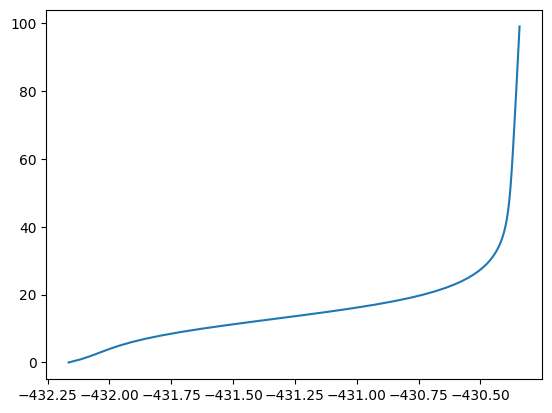

In [13]:
plt.plot(Logs,range(100))

In [14]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture()

In [15]:
mean2 = [100, 200]
std2 = [10, 20]
pie2 = [0.5,0.5]
q2, [mean2, std2, pie2], Logs = GMM(mean2,std2,pie2,X,100)

In [16]:
mean2, std2, pie2

([6.8272073694553335, 2.621707547059529],
 [1.789209694320291, 0.9021468239542023],
 array([0.9124, 0.0876]))

In [17]:
a = np.argmax(q2,axis=0)
a[a == 0].shape[0], a[a == 1].shape[0]

(182, 18)

In [18]:
mean3 = [50, 60]
std3 = [10, 20]
pie3 = [0.5,0.5]
q3, [mean3, std3, pie3], Logs = GMM(mean3,std3,pie3,X,100)

In [19]:
mean3, std3, pie3

([2.6210488557196863, 6.826960705308252],
 [0.9018036687814783, 1.7893927228347961],
 array([0.08754, 0.91246]))

In [20]:
a = np.argmax(q3,axis=0)
a[a == 0].shape[0], a[a == 1].shape[0]

(18, 182)

In [23]:
K = 2
pie = [1/K,1/K]
mean = [data[::2].mean(), data[1::2].mean()]
std = [data[::2].std(), data[1::2].std()]
q, [mean, std, pie], Logs = GMM(mean,std,pie,X,1000)

In [24]:
mean,std,pie
a = np.argmax(q,axis=0)
a[a == 0].shape[0], a[a == 1].shape[0]

(18, 182)